# Exploratory Data Analysis #

## Set up imports for Pandas, Matplotlib, and MySQL Connector ##

In [471]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as connection

## Use MySQL Connector to establish a connection to my remote data source ##

In [472]:
myremotedb = connection.connect(host = "devcodecamp-mysql.c5p7yvjq1h8y.us-east-2.rds.amazonaws.com", database = "salesdb", user = "root", password = "D3v$tudent", use_pure = True)

## Query **salesdb** to JOIN the information from the *sales* and *cities* tables and save as a single data frame ##

In [473]:
joinquery = """SELECT sales.Invoice_ID,
                    sales.Customer_Type,
                    sales.Gender,
                    sales.Product_Line,
                    sales.Unit_Price,
                    sales.Quantity,
                    sales.Sales_Tax,
                    sales.Total,
                    sales.Date,
                    sales.Time,
                    sales.Payment,
                    sales.COGS,
                    sales.Gross_Income,
                    sales.rating,
                    cities.City
                    FROM sales 
                    JOIN cities 
                    ON sales.City_ID = cities.City_ID """
joined_df = pd.read_sql_query(joinquery, myremotedb)
joined_df.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_26240\2112312959.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  joined_df = pd.read_sql_query(joinquery, myremotedb)


,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Sales_Tax,Total,Date,Time,Payment,COGS,Gross_Income,rating,City
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,None,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,7.0,Seattle
1,101-81-4070,Member,Female,Health and beauty,62.82,2,None,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,4.9,Milwaukee
2,102-06-2002,Member,Male,Sports and travel,25.25,5,None,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,6.1,Milwaukee
3,102-77-2261,Member,Male,Health and beauty,65.31,7,None,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,4.2,Milwaukee
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,None,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,6.6,Seattle


## Perform necessary data cleaning and wrangling steps on Joined DataFrame ##

* Explore all the `values` within all the `columns` of the new *Joined DataFrame* 

In [474]:
joined_df["Rating"] = joined_df["rating"]
dropped_rating_df = joined_df.drop("rating", axis = 1)
dropped_rating_df.head()


,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Sales_Tax,Total,Date,Time,Payment,COGS,Gross_Income,City,Rating
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,None,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,Seattle,7.0
1,101-81-4070,Member,Female,Health and beauty,62.82,2,None,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,Milwaukee,4.9
2,102-06-2002,Member,Male,Sports and travel,25.25,5,None,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,Milwaukee,6.1
3,102-77-2261,Member,Male,Health and beauty,65.31,7,None,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,Milwaukee,4.2
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,None,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,Seattle,6.6


* Check for/drop null `values` from *Joined DataFrame* 

In [475]:

no_null_df = dropped_rating_df.drop("Sales_Tax", axis = 1)

no_null_df.head ()


,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Time,Payment,COGS,Gross_Income,City,Rating
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,Seattle,7.0
1,101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,Milwaukee,4.9
2,102-06-2002,Member,Male,Sports and travel,25.25,5,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,Milwaukee,6.1
3,102-77-2261,Member,Male,Health and beauty,65.31,7,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,Milwaukee,4.2
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,Seattle,6.6


`Sales_Tax column removed`

* Check for duplicate `rows` from the *No Null DataFrame*

In [476]:
no_null_df.duplicated().sort_values()



0      False
658    False
659    False
660    False
661    False
       ...  
339    False
340    False
341    False
328    False
999    False
Length: 1000, dtype: bool

`No duplicate rows to delete`

* Convert any necessary `values` to *Panda DateTime* format within `columns` of the *No Null DataFrame*

In [477]:
no_null_df["Date"] = pd.to_datetime(no_null_df["Date"])
# no_null_df["Time"] = pd.to_datetime(no_null_df["Time"])
no_null_df.head()

,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Time,Payment,COGS,Gross_Income,City,Rating
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,2019-03-13,19:44,Credit card,320.53,16.0265,Seattle,7.0
1,101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,2019-01-17,12:36,Ewallet,125.64,6.2820,Milwaukee,4.9
2,102-06-2002,Member,Male,Sports and travel,25.25,5,132.5625,2019-03-20,17:52,Cash,126.25,6.3125,Milwaukee,6.1
3,102-77-2261,Member,Male,Health and beauty,65.31,7,480.0285,2019-03-05,18:02,Credit card,457.17,22.8585,Milwaukee,4.2
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,45.1080,2019-02-27,12:22,Ewallet,42.96,2.1480,Seattle,6.6


`Date and Time columns converted to Panda DateTime format`

#### Create a `variable` that represents the final filtered *DataFrame*

In [478]:
clean_df = no_null_df
clean_df.head()

,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Time,Payment,COGS,Gross_Income,City,Rating
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,2019-03-13,19:44,Credit card,320.53,16.0265,Seattle,7.0
1,101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,2019-01-17,12:36,Ewallet,125.64,6.2820,Milwaukee,4.9
2,102-06-2002,Member,Male,Sports and travel,25.25,5,132.5625,2019-03-20,17:52,Cash,126.25,6.3125,Milwaukee,6.1
3,102-77-2261,Member,Male,Health and beauty,65.31,7,480.0285,2019-03-05,18:02,Credit card,457.17,22.8585,Milwaukee,4.2
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,45.1080,2019-02-27,12:22,Ewallet,42.96,2.1480,Seattle,6.6


## Examine the Spread of `values` across `columns` within `Filtered DataFrame` ##

* How many sales were made for members vs. normal customers

In [479]:
customer_type_sales_frequency = clean_df["Customer_Type"].value_counts()
customer_type_sales_frequency
# customer_type_sales_frequency_query = " SELECT Customer_Type, COUNT(Customer_Type) AS Customer_Transaction_Count FROM sales GROUP BY Customer_Type ORDER BY Customer_Type"
# customer_type_sales_frequency_df = pd.read_sql_query(customer_type_sales_frequency_query, myremotedb)
# customer_type_sales_frequency_df



Member    501
Normal    499
Name: Customer_Type, dtype: int64

* How many sales were made at each store location

In [480]:
sale_transaction_amount_per_location = clean_df["City"].value_counts()
sale_transaction_amount_per_location

# sale_transaction_amount_per_location_query = " SELECT City, COUNT(City) AS Sale_Transactions_Per_City FROM city_saledbcity_saledb GROUP BY City ORDER BY City DESC"
# sale_transaction_amount_per_location_df = pd.read_sql_query(sale_transaction_amount_per_location_query, myremotedb)
# sale_transaction_amount_per_location_df

Seattle          340
New York City    332
Milwaukee        328
Name: City, dtype: int64

* How many sales were made for each product line

In [481]:
amount_sold_per_product = clean_df["Product_Line"].value_counts()
amount_sold_per_product

# amount_sold_per_product_query = " SELECT Product_Line, COUNT(Product_line) AS Product_Line_Count FROM sales GROUP BY Product_Line ORDER BY Product_LIne_Count DESC"
# amount_sold_per_product_df = pd.read_sql_query(amount_sold_per_product_query, myremotedb)
# amount_sold_per_product_df

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product_Line, dtype: int64

* What is the overall average rating, based on all sales records

In [482]:
overall_rating_average = clean_df["Rating"].mean()
overall_rating_average

# overall_rating_average_query = " SELECT AVG(Rating) as Overall_Ratings_Average FROM sales "
# overall_rating_average_df = pd.read_sql_query(overall_rating_average_query, myremotedb)
# overall_rating_average_df

6.9727

## Create three visualizations of the `DataFrame` to better understand any trends or patterns within the data set with each containing a **chart  title** / **X-axis label** / **Y-axis label** ##

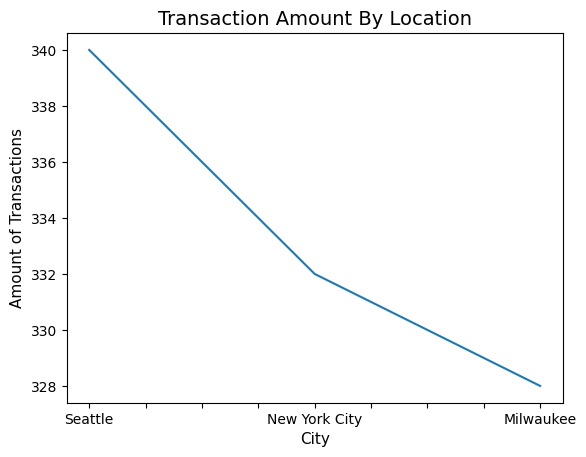

In [485]:
sale_transaction_amount_per_location.plot()
plt.title("Transaction Amount By Location", fontsize = 14)
plt.xlabel("City", fontsize = 11);
plt.ylabel("Amount of Transactions" , fontsize = 11);